In [2]:
# First read code from:
# http://machinelearninguru.com/deep_learning/tensorflow/basics/tfrecord/tfrecord.html

import tensorflow as tf
import numpy as np
import imageio
from skimage.transform import resize
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filenames = ['datadirectory/toydynamics_nograv/Video_ball_colortrain.tfrecords']

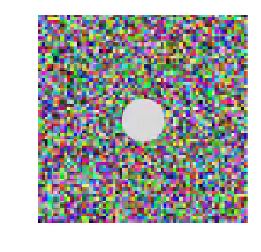

[ 6  8  9  3 14  2 15 16  5 13]


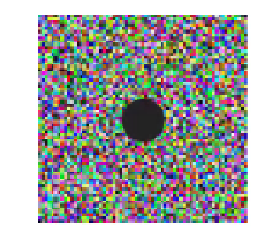

[18 30 10 28 11 26 23  4 36  0]


In [4]:
# This is essentially just a sanity-check to make sure images can be correctly decoded from this 
# proprietary input format. 
with tf.Session() as sess:
    featureset = {'video': tf.FixedLenFeature([],tf.string),
                  'frame': tf.FixedLenFeature([],tf.int64),
                  'image': tf.FixedLenFeature([],tf.string),
                  }
    ## We need to create an input queue to read from this intelligently:
    filename_queue = tf.train.string_input_producer(filenames)
    
    ## Define a reader. Does the input queue above "break down the record?"
    reader = tf.TFRecordReader()
    _,serialized_example = reader.read(filename_queue)
    
    ## If this contains just a single example, we now want to read it:
    features = tf.parse_single_example(serialized_example,features = featureset)
    
    # Convert string representation to integers:
    image = tf.decode_raw(features['image'],tf.float64)
    
    image = tf.reshape(image,[128,128,3])
 
    # Convert label to string:
    label = features['frame']
    video = features['video']
    
    images,labels,videos = tf.train.shuffle_batch([image, label, video], batch_size=10, capacity=30, num_threads=1, min_after_dequeue=10)
    ## Now run:
    init_op = tf.group(tf.global_variables_initializer(),tf.local_variables_initializer())
    sess.run(init_op)

    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord = coord)

    for batch_index in range(2):
        image,label = sess.run([images,labels])
       
        #image = image.astype(np.uint8)
        plt.imshow(image[0,:,:,:])
        plt.axis('off')
        plt.show()
        
        print(label)
    coord.request_stop()
    
    # Wait for threads to stop
    coord.join(threads)
    sess.close()

In [5]:
## Now we want to try working with the Dataset Api.
# Define a function that wraps the preprocessing steps you defined above:
def preprocess(serialized_example):
    featureset = {'video': tf.FixedLenFeature([],tf.string),
                  'frame': tf.FixedLenFeature([],tf.int64),
                  'image': tf.FixedLenFeature([],tf.string),
                  }
    features = tf.parse_single_example(serialized_example,features = featureset)
    
    # Convert string representation to integers:
    image = tf.decode_raw(features['image'],tf.float64)
    
    image = tf.reshape(image,[128,128,3])
    # image.set_shape
    # Convert label to string:
    label = features['frame']
    video = features['video']
    return image,label,video
    
base_dataset = tf.data.TFRecordDataset(filenames)
# Get out the images and tags in a useful format
preprocessed = base_dataset.map(preprocess)
## We now want to batch the dataset into groups of three neighboring frames:
triplets = preprocessed.apply(tf.contrib.data.batch_and_drop_remainder(10))
## Shuffle
shuffled = triplets.repeat(2).shuffle(40)
## Make an iterator:
it = shuffled.make_one_shot_iterator()

next_images,next_label,_ = it.get_next()

In [6]:
sess = tf.Session()
for j in range(10):
    it = shuffled.make_one_shot_iterator()
    next_images,next_label,_ = it.get_next()
    i = 0
    while True:
        try:
            image,label = sess.run([next_images,next_label])
            print(i)
            i+=1
        except tf.errors.OutOfRangeError:
            break
    print(j,'this is j')
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
0 this is j
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
4

150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
9 this is j


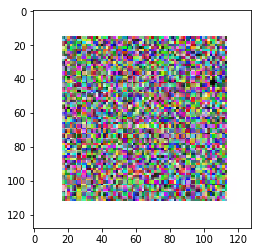

array([609, 610, 611])

In [35]:
plt.imshow(image[2,:,:,:])
plt.show()
label

In [40]:
label

array([[300, 301, 302],
       [105, 106, 107],
       [690, 691, 692],
       [171, 172, 173],
       [369, 370, 371],
       [ 30,  31,  32],
       [345, 346, 347],
       [243, 244, 245],
       [690, 691, 692],
       [183, 184, 185]])

In [9]:
import os
os.listdir()

['datadirectory',
 '.DS_Store',
 'models.py',
 'ConstrainedGenMod_ToyDynamics.ipynb',
 'ConstrainedGen_ReadExamples.ipynb',
 'toydynamics',
 '.ipynb_checkpoints',
 '.git',
 'ConstrainedGen_TrainConvert.ipynb',
 'Convert_Dataset.py']